# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


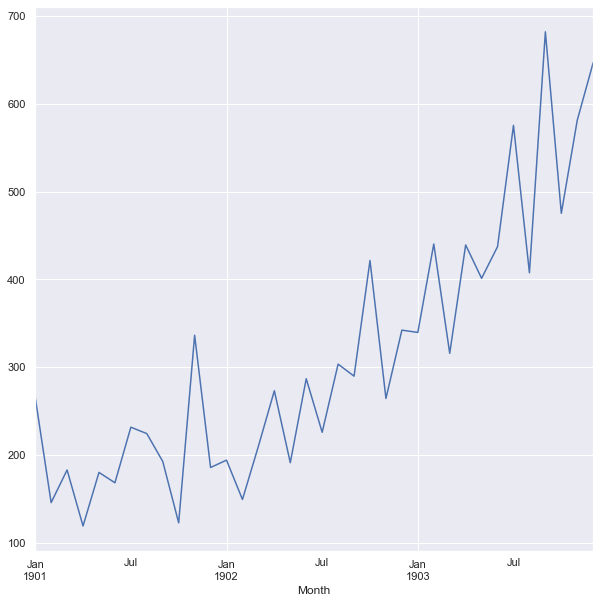

In [5]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('../datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

In [19]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -197.346
Method:                       css-mle   S.D. of innovations             66.848
Date:                Thu, 18 Jun 2020   AIC                            404.692
Time:                        19:07:11   BIC                            412.469
Sample:                    02-01-1901   HQIC                           407.377
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9920      4.143      2.895      0.007       3.872      20.112
ar.L1.D.Sales    -1.0827      0.177     -6.126      0.000      -1.429      -0.736
ar.L2.D.Sales    -0.5481      0.249     

C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [8]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=349.117707, expected=342.300000
predicted=306.512900, expected=339.700000
predicted=387.376302, expected=440.400000
predicted=348.154174, expected=315.900000
predicted=386.308859, expected=439.300000
predicted=356.081994, expected=401.300000
predicted=446.379468, expected=437.400000
predicted=394.737260, expected=575.500000
predicted=434.915421, expected=407.600000
predicted=507.923427, expected=682.000000
predicted=435.483054, expected=475.300000
predicted=652.743794, expected=581.300000
predicted=546.343411, expected=646.900000


In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [37]:
# fit model
    # No todas las combinaciones de los parámetros son factibles.

for i in range(7):

    for j in range(i+1,8):
        model = ARIMA(series, order=(i,1,j))
        model_fit = model.fit(disp=0)

        # Predicciones y sobre test
        X = series.values
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA(history, order=(i,1,j))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)

        error = mean_squared_error(test, predictions)
       
        print(i,"",j,'Test MSE: %.3f' % error) 
    

C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0  1 Test MSE: 9558.175


C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [34]:
# fit model

for i in range(7):

    for j in range(i+1,8):
        
        print(i,"",j)
        
    

0  1
0  2
0  3
0  4
0  5
0  6
0  7
1  2
1  3
1  4
1  5
1  6
1  7
2  3
2  4
2  5
2  6
2  7
3  4
3  5
3  6
3  7
4  5
4  6
4  7
5  6
5  7
6  7


In [48]:
i=6
j=1

model = ARIMA(series, order=(i,1,j))
model_fit = model.fit(disp=0)

# Predicciones y sobre test
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(i,1,j))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

error = mean_squared_error(test, predictions)
print(i)
print('Test MSE: %.3f' % error) 
    

C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Daniel Camillo Rojas\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_para

6
Test MSE: 4411.890
